In [1]:
%matplotlib inline
import os
import numpy as np
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
from mintpy.utils import readfile, writefile, plot as pp
from mintpy.view import prep_slice, plot_slice
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2023-Yang-Landslides/notebooks/velo')
os.chdir(work_dir)
print('Go to directory:', work_dir)

proj_dir = os.path.expanduser('~/data/china/jinsha')
vel_file = os.path.join(proj_dir, 'S1_D062/mintpy_aoi/Clip_S1D_velocity.tif')
dem_file = os.path.join(proj_dir, 'DEM/srtm1.h5')

Go to directory: /Users/yunjunz/Papers/2023-Yang-Landslides/notebooks/velo


### Prepare metadata

In [2]:
# read existing metadata from GeoTIFF file
meta = readfile.read_gdal_vrt(vel_file)
# add more metadata
meta['UNIT'] = 'm/year'
meta['PROCESSOR'] = 'gdal'
# write into RSC file to be read by mintpy automatically
writefile.write_roipac_rsc(meta, vel_file+'.rsc')

'/Users/yunjunz/data/china/jinsha/S1_D062/mintpy_aoi/Clip_S1D_velocity.tif.rsc'

### Plot via `mintpy.view`

view.py /Users/yunjunz/data/china/jinsha/S1_D062/mintpy_aoi/Clip_S1D_velocity.tif --dem /Users/yunjunz/data/china/jinsha/DEM/srtm1.h5 --dem-nocontour -u cm/year -v -3 0 -c Oranges_r --lalo-label --lalo-step 0.2 --ylabel-rot 90 --fontsize 12 --noverbose --scalebar 0.25 0.2 0.05 --cbar-nbins 3 --cbar-label LOS velocity [cm/year] --title S1 asc. velocity


/Users/yunjunz/tools/MintPy/src/mintpy/utils/plot.py:1666: RuntimeWarning: overflow encountered in multiply
  data *= np.array(scale, dtype=data.dtype)


save figure to file: /Users/yunjunz/Papers/2023-Yang-Landslides/notebooks/velo/s1_asc_vel.png


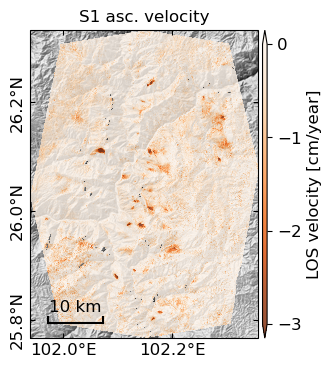

In [3]:
# create figure
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=[6, 4], subplot_kw=subplot_kw)

# check more options by running view.py -h
cmd = f'view.py {vel_file} --dem {dem_file} --dem-nocontour -u cm/year -v -3 0 -c Oranges_r '
cmd += ' --lalo-label --lalo-step 0.2 --ylabel-rot 90 --fontsize 12 --noverbose '
cmd += ' --scalebar 0.25 0.2 0.05 --cbar-nbins 3 --cbar-label "LOS velocity [cm/year]" '
cmd += ' --title "S1 asc. velocity"'
data, meta, inps = prep_slice(cmd)
ax, inps, im, cbar = plot_slice(ax, data, meta, inps)

# output
out_fig = os.path.join(work_dir, 's1_asc_vel.png')
print('save figure to file:', out_fig)
fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()